If I want to numerically look at things like what's the pressure max and things like that , I need to load in the athena data as a numpy array. I think there's a script to do this somewhere:

``./../vis/join_vtk.sh -i sphtorus -o sphtorus -v density -c 0:1:91``

Only use join if different directories because ran on different processors 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
cd ~/Programs/athena-sph/vis

/u/dorislee/Programs/athena-sph/vis


In [8]:
ls

ath_plots.py   ath_units.py  join_vtk.c    particle/  slice/   turb.py
ath_read.py    idl/          join_vtk.sh*  ppm/       sm/      vtk/
ath_styles.py  join_vtk*     matlab/       python/    test.py


In [12]:
from ath_read import AthenaData

In [50]:
data =AthenaData(datapath="../sphtorus/", basename="sphtorus",step=1)

In [51]:
data.fields

['momentum_xyz', 'total_energy', 'momentum', 'density']

In [24]:
rho = data.get_field("density")

In [26]:
rho.shape

(128, 64, 8)

<matplotlib.colorbar.Colorbar instance at 0x7f3acd508710>

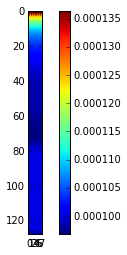

In [30]:
timestep = 3
plt.imshow(rho[::,timestep])
plt.colorbar()

So only conservatives here, modify the athinput so that printing out primitives 

In [22]:
!head ath_read.py

import numpy as np
import struct
from ath_units import *

class AthenaData():
    def __init__(self,datapath='.',basename='',step=0,units=None):
        self.datapath = datapath
        self.basename = basename
        self.step = step
        if units is not None:


In [39]:
cd ../

/u/dorislee/Programs/athena-sph


In this new run (shorter), primitives should be the output. So we can look at what the velocity distribution is like

In [41]:
data2 =AthenaData(datapath="sphtorus_prim/", basename="torus",step=1)

In [42]:
data2.fields

['velocity', 'pressure', 'velocity_xyz', 'density']

In [43]:
data2.fields

['velocity', 'pressure', 'velocity_xyz', 'density']

Trying to find the constant factor $\Omega_0$ to correspond to $\Omega(r) = \Omega_0(\omega_0/r)^q$

In [47]:
data2.get_field("velocity_x")

KeyError: 'momentum'

In [46]:
data2.get_field("velocity")

KeyError: 'momentum'

outputing primitives are bad when you use athena_read because athena_read tries to find the column on momentum and divide it by the density to find the velocity. but then if you output primitives, there will not be a column of momentum, so the code dies. So just stick with data with conservative outputs. 

Doesn't velocity_x correspond to x1 ==> r ? this hsould be zero ?

In [53]:
data.get_field("velocity_x")

array([[[-0.25676403, -0.25676403, -0.25676403, ..., -0.25676403,
         -0.25676403, -0.25676403],
        [-0.25687722, -0.25687722, -0.25687722, ..., -0.25687722,
         -0.25687722, -0.25687722],
        [-0.2569393 , -0.2569393 , -0.2569393 , ..., -0.2569393 ,
         -0.2569393 , -0.2569393 ],
        ..., 
        [-0.2569393 , -0.2569393 , -0.2569393 , ..., -0.2569393 ,
         -0.2569393 , -0.2569393 ],
        [-0.25687722, -0.25687722, -0.25687722, ..., -0.25687722,
         -0.25687722, -0.25687722],
        [-0.25676403, -0.25676403, -0.25676403, ..., -0.25676403,
         -0.25676403, -0.25676403]],

       [[-0.15683866, -0.15683866, -0.15683866, ..., -0.15683866,
         -0.15683866, -0.15683866],
        [-0.15710656, -0.15710656, -0.15710656, ..., -0.15710656,
         -0.15710656, -0.15710656],
        [-0.15726407, -0.15726407, -0.15726407, ..., -0.15726407,
         -0.15726407, -0.15726407],
        ..., 
        [-0.15726407, -0.15726407, -0.15726407, ...,

And this instead should be nonzero...

In [55]:
data.get_field("velocity_z")

array([[[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ..., 
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ..., 
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        ..., 
        [-0., -0., -0., ..., -0., -0., -0.],
        [-0., -0., -0., ..., -0., -0., -0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 

this makes sense if it is smart enough to convert it back into x y sicne then the xy  component woould be nonzero and Vz is zero but I don't see anywhere in the code that does this conversion so it must be just a coincidence 

# SphPPI 

Fixed the floating point error bug and can run now but It looks like a high density ambient condition which is not what we want

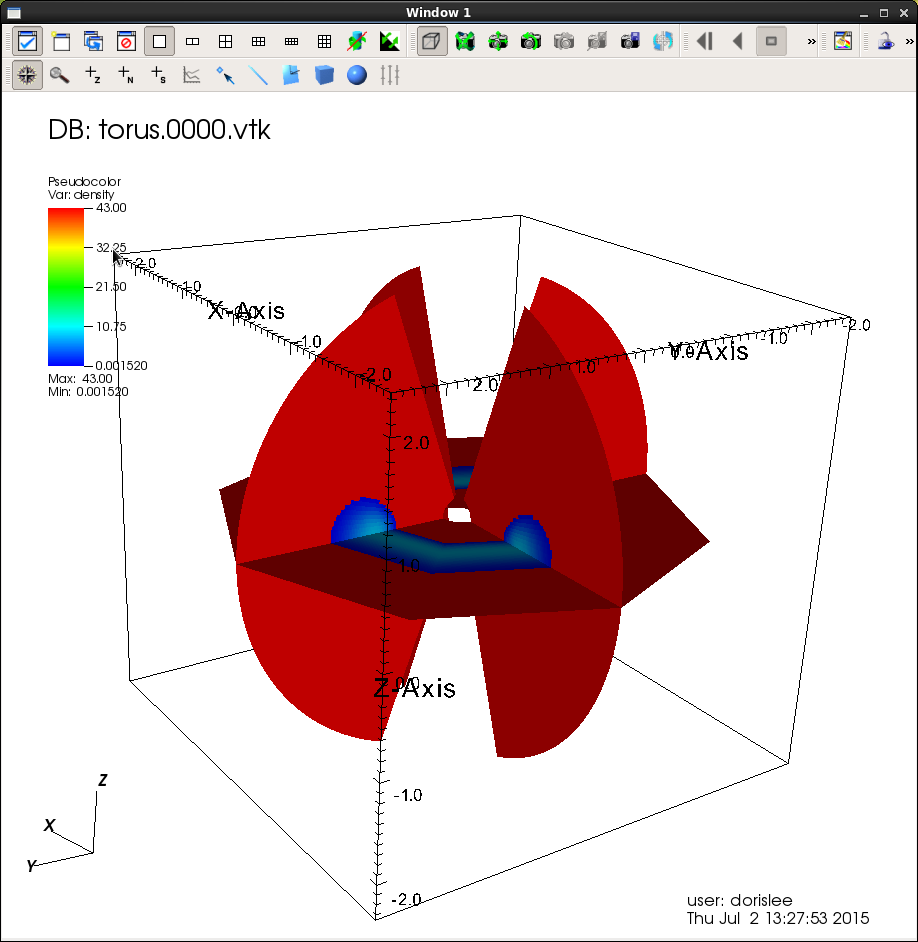

In [56]:
from IPython.display import Image
Image(filename="/u/dorislee/usrp/data/torusppi.png",width=600)

#Slender Torus A3 